In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dtypes = {
    "ra": "float32",
    "dec": "float32",
    "parallax": "float32",
    "err_mag_pstotal_r": "float32",
    "err_mag_pstotal_i": "float32",
    "err_mag_pstotal_j0660": "float32",
    "gaia_ruwe": "float32",
    "gaia_parallax_over_error": "float32",
    "gaia_classprob_dsc_combmod_star": "float32",
    "gaia_in_qso_candidates": "int8",
    "gaia_in_galaxy_candidates": "int8",
    "gaia_phot_bp_rp_excess_factor": "float32",
    "mag_pstotal_r": "float32",
    "mag_pstotal_i": "float32",
    "mag_pstotal_j0660": "float32",
}

df = pd.read_csv(
    "../data/all_0.7frac.csv",
    engine="pyarrow",
    dtype=dtypes,
    usecols=list(dtypes.keys())
)

In [3]:
df = df[(df['err_mag_pstotal_r'] < 0.2)&(df['gaia_ruwe'] < 1.6) & (df['gaia_parallax_over_error'] > 3) & (df['gaia_classprob_dsc_combmod_star'] > 0.5) & (df['gaia_in_qso_candidates'] == 0) & (df['gaia_in_galaxy_candidates'] == 0) & (df['gaia_phot_bp_rp_excess_factor'].between(1.0, 1.3))]

In [4]:
df = df[df['mag_pstotal_r'].between(14, 24)]

In [5]:
df

,ra,dec,parallax,err_mag_pstotal_r,err_mag_pstotal_i,err_mag_pstotal_j0660,gaia_ruwe,gaia_parallax_over_error,gaia_classprob_dsc_combmod_star,gaia_in_qso_candidates,gaia_in_galaxy_candidates,gaia_phot_bp_rp_excess_factor,mag_pstotal_r,mag_pstotal_i,mag_pstotal_j0660
5,18.539995,-22.293573,0.200813,0.006835,0.007126,0.008527,1.033433,3.111667,0.999963,0,0,1.192035,16.845142,16.731493,16.815222
10,19.101349,-22.287970,0.731063,0.024012,0.020315,0.027379,0.999702,3.138736,0.999996,0,0,1.232955,18.908827,18.438839,18.723942
22,18.333784,-22.279795,0.971279,0.024532,0.016195,0.025327,1.020344,5.638539,0.999976,0,0,1.291472,18.881609,18.022903,18.561596
24,18.672041,-22.286585,1.098123,0.004638,0.004300,0.005516,0.967747,20.438536,0.999934,0,0,1.239354,16.127293,15.818553,16.009037
32,19.037130,-22.276699,0.563955,0.012872,0.012000,0.015120,1.097718,3.909532,0.999948,0,0,1.264884,17.983582,17.664656,17.839634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21229304,326.750000,-26.248634,0.520840,0.008263,0.007755,0.012227,0.998474,7.127597,0.999969,0,0,1.214958,16.923006,16.752089,16.885485
21229317,326.790588,-26.252598,0.577181,0.007895,0.007175,0.011473,0.943245,8.189767,0.999991,0,0,1.214487,16.833715,16.625885,16.784241
21229319,326.505127,-26.248947,0.631182,0.004918,0.004611,0.007128,0.928268,12.873307,0.999967,0,0,1.204401,15.996414,15.851838,15.960638
21229320,326.431915,-26.255814,0.363092,0.008160,0.007736,0.012026,1.017991,4.734919,0.999971,0,0,1.207013,16.890957,16.725077,16.854662


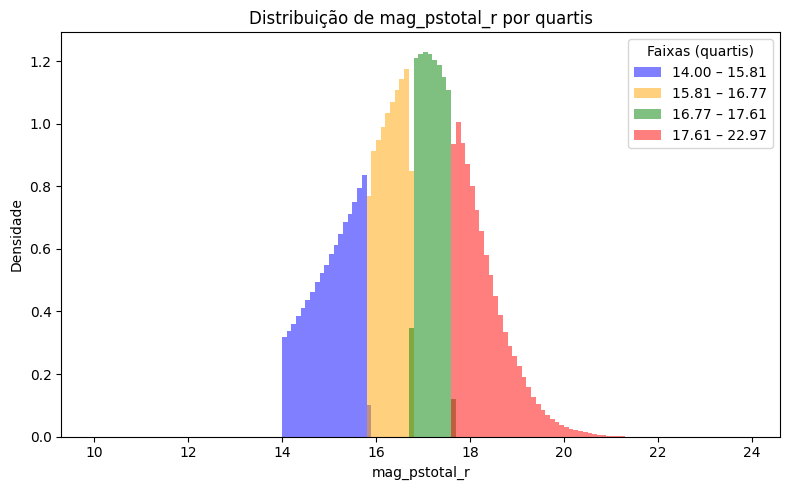

In [34]:
# Quartis
quartis = np.percentile(df['mag_pstotal_r'], [25, 50, 75])
colors = ['blue', 'orange', 'green', 'red']

# Limites dos quartis (incluindo min e max)
q_bounds = [df['mag_pstotal_r'].min()] + quartis.tolist() + [df['mag_pstotal_r'].max()]

plt.figure(figsize=(8,5))

for i in range(4):
    lower = q_bounds[i]
    upper = q_bounds[i+1]

    if i == 0:
        subset = df[df['mag_pstotal_r'] <= upper]
    elif i == 3:
        subset = df[df['mag_pstotal_r'] > lower]
    else:
        subset = df[(df['mag_pstotal_r'] > lower) & (df['mag_pstotal_r'] <= upper)]

    plt.hist(
        subset['mag_pstotal_r'],
        bins=np.arange(10, 24, 0.1),
        density=True,
        alpha=0.5,
        color=colors[i],
        label=f'{lower:.2f} – {upper:.2f}'
    )

plt.xlabel('mag_pstotal_r')
plt.ylabel('Densidade')
plt.title('Distribuição de mag_pstotal_r por quartis')
plt.legend(title='Faixas (quartis)')
plt.tight_layout()
plt.show()

In [7]:
df1 = df[df['mag_pstotal_r'] < 16]
df2 = df[(df['mag_pstotal_r'] > 16) & (df['mag_pstotal_r'] < 17)]
df3 = df[(df['mag_pstotal_r'] > 17) & (df['mag_pstotal_r'] < 18)]
df4 = df[(df['mag_pstotal_r'] > 18) & (df['mag_pstotal_r'] < 23)]

/tmp/ipykernel_68622/468298588.py:111: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


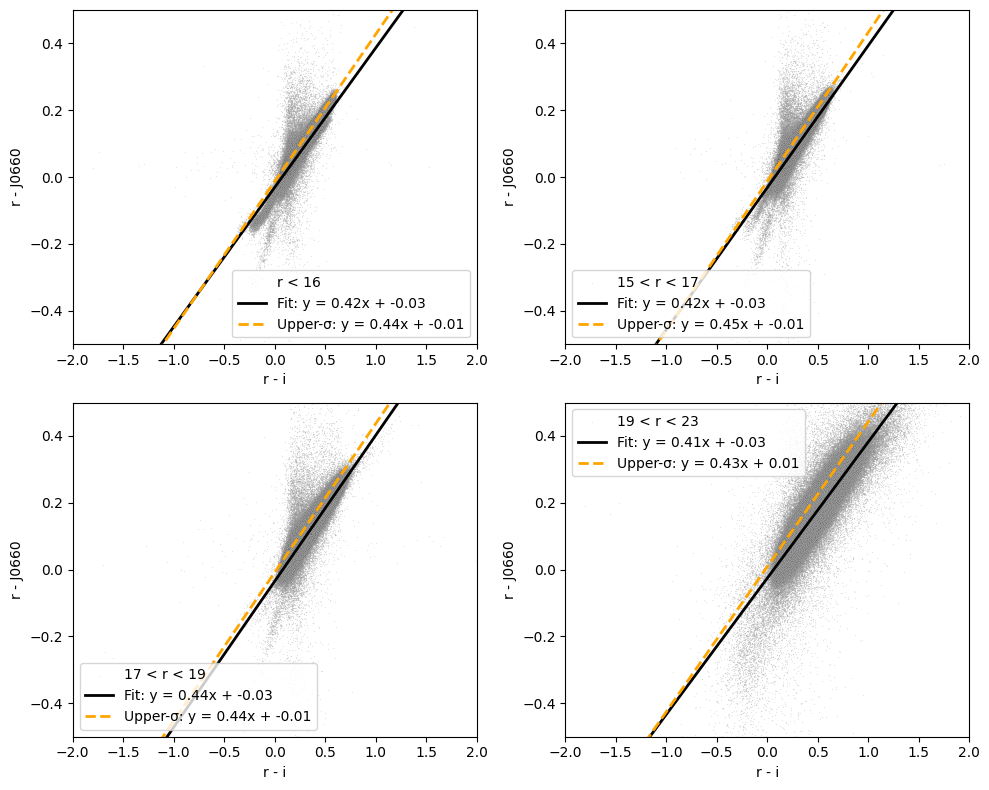

In [38]:


def plot_scatter_with_two_fits(ax, x_series, y_series, label,
                               color_upper='orange',
                               color_basic='black',
                               k_lower=0.5, k_upper=3.0,
                               max_iter=4, min_pts=20):
    """
    Plota pontos, um ajuste linear básico e um ajuste upper-envelope via σ-clipping iterativo.
    """

    # === Limpeza dos dados ===
    x = np.asarray(x_series, dtype=float)
    y = np.asarray(y_series, dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    x, y = x[mask], y[mask]

    # === Scatter plot ===
    ax.scatter(
        x, y, s=0.5,
        label=label,
        color='white',
        alpha=0.3,
        edgecolors='black',
        linewidths=0.1
    )

    # === Fit básico ===
    if x.size >= 2 and not np.isclose(x.std(), 0.0):
        try:
            m_basic, b_basic = np.polyfit(x, y, 1)
            xmin, xmax = ax.get_xlim()
            if not np.isfinite([xmin, xmax]).all() or xmin == xmax:
                xmin, xmax = (x.min(), x.max())
            x_fit = np.linspace(xmin, xmax, 100)
            y_fit = m_basic * x_fit + b_basic
            ax.plot(x_fit, y_fit, lw=2, color=color_basic,
                    label=f'Fit: y = {m_basic:.2f}x + {b_basic:.2f}')
        except np.linalg.LinAlgError:
            ax.text(0.02, 0.9, "Falha no ajuste (SVD)",
                    transform=ax.transAxes, va='top', ha='left', fontsize=8)
    else:
        ax.text(0.02, 0.95, "Sem variância/pts p/ ajuste",
                transform=ax.transAxes, va='top', ha='left', fontsize=8)

    # === Upper-envelope fit ===
    if x.size >= min_pts and not np.isclose(x.std(), 0.0):
        try:
            # Ajuste inicial
            m, b = np.polyfit(x, y, 1)
            prev_n = len(x)

            for _ in range(max_iter):
                r = y - (m * x + b)
                mad = np.median(np.abs(r - np.median(r)))
                sigma = 1.4826 * mad if mad > 0 else r.std()
                if not np.isfinite(sigma) or sigma == 0:
                    break

                keep = (r > -k_lower * sigma) & (r < k_upper * sigma)
                if keep.sum() < min_pts or keep.sum() == prev_n:
                    break

                x, y = x[keep], y[keep]
                prev_n = x.size

                m, b = np.polyfit(x, y, 1)

            xmin, xmax = ax.get_xlim()
            if not np.isfinite([xmin, xmax]).all() or xmin == xmax:
                xmin, xmax = (x.min(), x.max())
            x_fit = np.linspace(xmin, xmax, 100)
            y_fit = m * x_fit + b

            ax.plot(x_fit, y_fit, color=color_upper, lw=2, linestyle='--',
                    label=f'Upper-σ: y = {m:.2f}x + {b:.2f}')

        except np.linalg.LinAlgError:
            ax.text(0.02, 0.85, "Falha upper σ-fit",
                    transform=ax.transAxes, va='top', ha='left', fontsize=8)
            
# ---- Seu código com os quatro painéis ----
plt.figure(figsize=(10, 8))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

plot_scatter_with_two_fits(ax1,
    df1['mag_pstotal_r'] - df1['mag_pstotal_i'],
    df1['mag_pstotal_r'] - df1['mag_pstotal_j0660'], 'r < 16'
)
plot_scatter_with_two_fits(ax2,
    df2['mag_pstotal_r'] - df2['mag_pstotal_i'],
    df2['mag_pstotal_r'] - df2['mag_pstotal_j0660'], '15 < r < 17'
)
plot_scatter_with_two_fits(ax3,
    df3['mag_pstotal_r'] - df3['mag_pstotal_i'],
    df3['mag_pstotal_r'] - df3['mag_pstotal_j0660'], '17 < r < 19'
)
plot_scatter_with_two_fits(ax4,
    df4['mag_pstotal_r'] - df4['mag_pstotal_i'],
    df4['mag_pstotal_r'] - df4['mag_pstotal_j0660'], '19 < r < 23'
)

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel('r - i')
    ax.set_ylabel('r - J0660')
    ax.set_ylim(-0.5, 0.5)
    ax.set_xlim(-2, 2)
    ax.legend()

plt.tight_layout()
plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Utilidades ----------
def color_vectors_from_df(df):
    x = (df['mag_pstotal_r'] - df['mag_pstotal_i']).to_numpy(float)       # (r - i)
    y = (df['mag_pstotal_r'] - df['mag_pstotal_j0660']).to_numpy(float)   # (r - J0660)

    # erros individuais de magnitude
    er = df['err_mag_pstotal_r'].to_numpy(float)
    ei = df['err_mag_pstotal_i'].to_numpy(float)
    ej = df['err_mag_pstotal_j0660'].to_numpy(float)

    # erros das cores
    sig_x = np.sqrt(er**2 + ei**2)   # σ_(r-i)
    sig_y = np.sqrt(er**2 + ej**2)   # σ_(r-J0660)
    return x, y, sig_x, sig_y

def fit_upper_sigma_clipped(x, y, k_lower=0.5, k_upper=3.0, max_iter=4, min_pts=20):
    """Retorna m, b, rms e máscara final usada no ajuste (upper-envelope σ-clipping)."""
    mask = np.isfinite(x) & np.isfinite(y)
    x, y = x[mask], y[mask]
    if x.size < min_pts or np.isclose(x.std(), 0.0):
        return None, None, None, mask

    m, b = np.polyfit(x, y, 1)
    prev_n = len(x)
    for _ in range(max_iter):
        r = y - (m*x + b)
        mad = np.median(np.abs(r - np.median(r)))
        sigma = 1.4826*mad if mad > 0 else r.std()
        if not np.isfinite(sigma) or sigma == 0:
            break

        keep = (r > -k_lower*sigma) & (r < k_upper*sigma)
        if keep.sum() < min_pts or keep.sum() == prev_n:
            break
        x, y = x[keep], y[keep]
        prev_n = x.size
        m, b = np.polyfit(x, y, 1)

    # RMS dos resíduos (no conjunto final usado)
    resid = y - (m*x + b)
    rms = np.sqrt(np.mean(resid**2)) if resid.size else None
    # reconstrói máscara global (opcional)
    mask_final = np.isfinite(mask)
    return m, b, rms, mask_final

def select_halpha_emitters(x, y, sig_x, sig_y, m_fit, b_fit, rms, C=5.0):
    """
    Implementa Eq.(1) e Eq.(2):
      ΔHα = y - (m_fit*x + b_fit)
      ΔHα > C * sqrt(rms^2 + sig_y^2 + (m_fit^2) * sig_x^2)
    Retorna boolean mask 'emitters'.
    """
    y_fit = m_fit*x + b_fit
    delta = y - y_fit  # Eq. (1)
    thr   = C * np.sqrt((rms if rms is not None else 0.0)**2 + sig_y**2 + (m_fit**2) * sig_x**2)  # Eq. (2)
    emitters = delta > thr
    return delta, thr, emitters

# ---------- Plot integrando tudo (usa seu estilo) ----------
def plot_panel_eq12(ax, df, label,
                    k_lower=0.5, k_upper=3.0, max_iter=4, min_pts=20, C=5.0):
    # cores e erros
    x, y, sig_x, sig_y = color_vectors_from_df(df)

    # scatter base
    ax.scatter(x, y, s=0.5, color='white', alpha=0.3, edgecolors='black', linewidths=0.1, label=label)

    # ajusta locus (upper-envelope σ-clipping)
    m, b, rms, _ = fit_upper_sigma_clipped(x, y, k_lower, k_upper, max_iter, min_pts)
    if m is None:
        ax.text(0.02, 0.95, "Falha no ajuste", transform=ax.transAxes, va='top', ha='left')
        return

    # plota as retas (fit básico opcional; aqui só upper para foco nas Eq.1–2)
    xx = np.linspace(*ax.get_xlim(), 200) if np.isfinite(ax.get_xlim()).all() else np.linspace(x.min(), x.max(), 200)
    ax.plot(xx, m*xx + b, color='orange', lw=2, ls='--', label=f'Upper-σ fit: y={m:.2f}x+{b:.2f}')

    # Eq.(1) e Eq.(2): Δ e limiar ponto-a-ponto
    delta, thr, emitters = select_halpha_emitters(x, y, sig_x, sig_y, m, b, rms, C=C)
    df_emitters = df[emitters]
    # destaca emissores Hα
    ax.scatter(x[emitters], y[emitters], s=6, color='crimson', alpha=0.9, label=f'Hα emitters (C={C:g})')

    # linha de corte "média" para visualização (usa median(sig_x), median(sig_y))
    med_sig_x = np.median(sig_x[np.isfinite(sig_x)])
    med_sig_y = np.median(sig_y[np.isfinite(sig_y)])
    delta_med = C * np.sqrt((rms if rms is not None else 0.0)**2 + med_sig_y**2 + (m**2) * med_sig_x**2)
    ax.plot(xx, m*xx + b + delta_med, color='firebrick', lw=1.5, ls=':', label='Eq.(2) (mediana dos erros)')

    ax.legend()
    ax.set_xlabel('r - i')
    ax.set_ylabel('r - J0660')
    return ax, df_emitters

/tmp/ipykernel_71584/918445964.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/gustavo/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


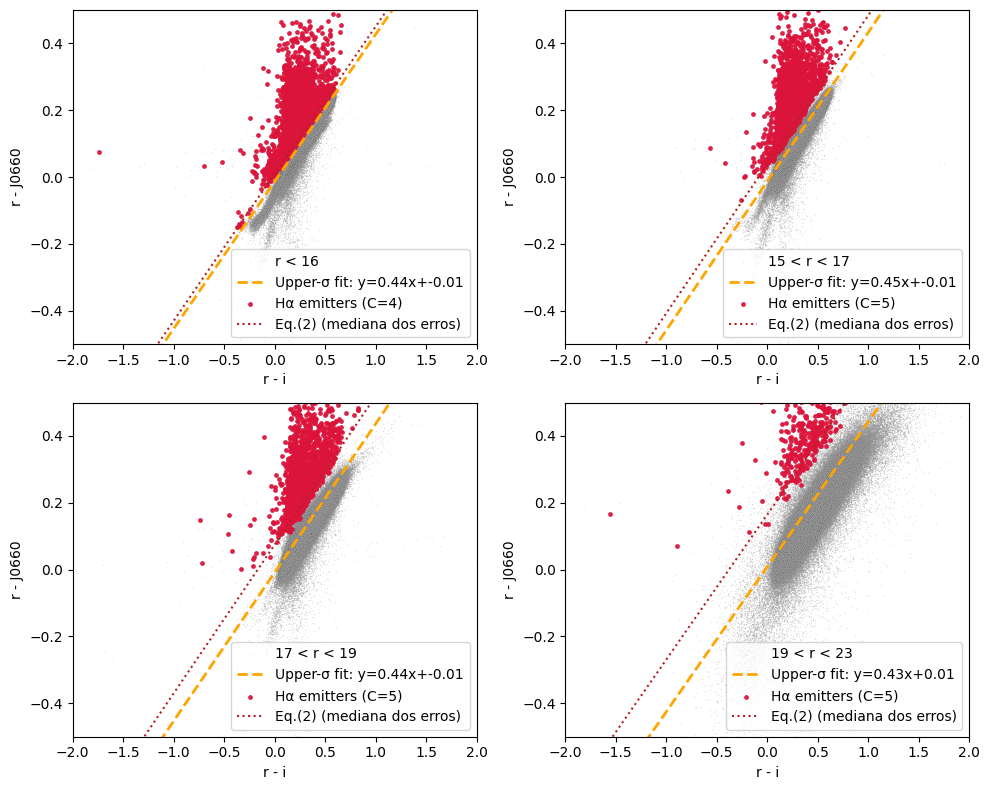

In [18]:
# ---------- Exemplo com seus 4 painéis ----------
plt.figure(figsize=(10, 8))
ax1 = plt.subplot(221); ax2 = plt.subplot(222); ax3 = plt.subplot(223); ax4 = plt.subplot(224)

ax1, em1 = plot_panel_eq12(ax1, df1, 'r < 16',   C=4.0)
ax2, em2 = plot_panel_eq12(ax2, df2, '15 < r < 17', C=5.0)
ax3, em3 = plot_panel_eq12(ax3, df3, '17 < r < 19', C=5.0)
ax4, em4 = plot_panel_eq12(ax4, df4, '19 < r < 23', C=5.0)

for ax in (ax1, ax2, ax3, ax4):
    ax.set_xlim(-2, 2); ax.set_ylim(-0.5, 0.5)
    ax.legend()

plt.tight_layout()
plt.show()

In [26]:
emitters = pd.concat([em1, em2, em3, em4])

In [27]:
emitters.to_csv('../data/halpha_emitters.csv', index=False)

In [29]:
len(emitters)

12628

In [ ]:
# Re-execute the plotting helper after environment reset.
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401


def plot_3d_from_df(
    data: pd.DataFrame,
    parallax_unit: str = "mas",
    min_parallax: float = 0.0,
    max_distance_pc: float | None = None,
    clip_percentile: float = 99.5,
    sample_max: int | None = 200_000,
    show_legend: bool = True
):
    """
    Make a physically meaningful 3D plot from a catalog with ra, dec, parallax.
    """
    df = data.copy()
    required = {"ra", "dec", "parallax"}
    missing = required - set(df.columns)
    if missing:
        raise ValueError(f"Missing required columns: {sorted(missing)}")

    df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["ra", "dec", "parallax"])
    if min_parallax is None:
        min_parallax = 0.0
    df = df[df["parallax"] > float(min_parallax)]
    if df.empty:
        raise ValueError("No rows left after filtering invalid/negative parallaxes.")

    # Convert to distance
    if parallax_unit.lower() == "mas":
        df["distance_pc"] = 1000.0 / df["parallax"].astype(float)
    elif parallax_unit.lower() == "arcsec":
        df["distance_pc"] = 1.0 / df["parallax"].astype(float)
    else:
        raise ValueError("parallax_unit must be 'mas' or 'arcsec'.")

    if max_distance_pc is not None:
        df = df[df["distance_pc"] <= float(max_distance_pc)]
    else:
        dcap = np.nanpercentile(df["distance_pc"], clip_percentile)
        df = df[df["distance_pc"] <= dcap]
    if df.empty:
        raise ValueError("No rows left after distance clipping.")

    if sample_max is not None and len(df) > sample_max:
        df = df.sample(sample_max, random_state=42)

    ra_rad = np.deg2rad(df["ra"].astype(float).to_numpy())
    dec_rad = np.deg2rad(df["dec"].astype(float).to_numpy())
    d_pc = df["distance_pc"].to_numpy()

    x = d_pc * np.cos(dec_rad) * np.cos(ra_rad)
    y = d_pc * np.cos(dec_rad) * np.sin(ra_rad)
    z = d_pc * np.sin(dec_rad)

    fig = plt.figure(figsize=(9, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(x, y, z, s=1, alpha=0.5)

    ax.set_xlabel("x [pc] (RA=0°, Dec=0°)")
    ax.set_ylabel("y [pc] (RA=90°, Dec=0°)")
    ax.set_zlabel("z [pc] (Dec=+90°)")
    ax.set_title("3D positions from (RA, Dec, Parallax)")

    # Equal aspect ratio
    max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max()
    Xb = 0.5 * max_range
    for axis, center in zip((ax.set_xlim, ax.set_ylim, ax.set_zlim),
                            ((x.max()+x.min())/2, (y.max()+y.min())/2, (z.max()+z.min())/2)):
        axis(center - Xb, center + Xb)

    # Optional legend text in plot
    if show_legend:
        legend_text = (
            "Coordinate System:\n"
            "  x → RA = 0°, Dec = 0°\n"
            "  y → RA = 90°, Dec = 0°\n"
            "  z → Dec = +90°\n\n"
            "Origin is at Earth\n"
            "Distance from origin = distance (pc)"
        )
        ax.text2D(0.02, 0.95, legend_text, transform=ax.transAxes, fontsize=9, va='top', ha='left')

    plt.show()
    return fig, ax


plot_3d_from_df(df)

NameError: name 'emitters' is not defined